### Controlling Overfitting using Regularized Regression 

In [1]:
#The required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model

For the next section you will be using the housing data that you have used in the previous session

#### 1. Create a basic setup

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’. (You may copy and paste the polynomial_dataframe() function created in the previous day)

In [2]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

In [3]:
def ridge_model(alpha,x,y):
    model = linear_model.Ridge(alpha = alpha, normalize = True)
    model.fit(x,y)
    return model

In [4]:
def plot_fitted_line(set_data,model):
    plt.plot(set_data['power_1'], set_data['price'],'.',
             set_data['power_1'], model.predict(set_data.drop('price',1)),'-')
    plt.show()

#### 2. Fitting a Polynomial L2 Regularised Regression Model of Order 15

Generate polynomial features up to degree 15 using `polynomial_dataframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5. Plot the model on the scatter plot



In [5]:
import os
os.getcwd()

'/Users/rushabhrumde/Desktop/MI'

In [6]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
df = df.sort_values(['sqft_living','price'])

In [8]:
poly15_data = polynomial_dataframe(df['sqft_living'], 15)
poly15_data['price'] = df['price']

In [9]:
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000,142000.0
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000,276000.0
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000,245000.0
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024,265000.0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000,228000.0


In [10]:
l2_small_penalty = 1.5e-5

In [11]:
model1 = ridge_model(l2_small_penalty, poly15_data.drop('price',1), poly15_data['price'])

In [12]:
print("Intercept of model1: ", model1.intercept_)
coeffs = pd.DataFrame(list(zip(poly15_data.drop('price',1).columns,model1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept of model1:  220664.37505312986


,features,estimated coefficients
0,power_1,1.248733e+02
1,power_2,-4.773760e-02
2,power_3,3.014462e-05
3,power_4,-2.444199e-09
4,power_5,-1.941537e-13
5,power_6,8.540857e-18
6,power_7,1.511421e-21
7,power_8,8.279791e-26
8,power_9,6.526031e-31
9,power_10,-3.278950e-34


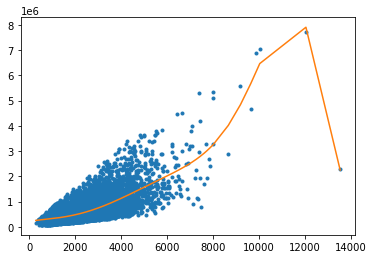

In [14]:
plot_fitted_line(poly15_data,model1)

### 3. Observe Overfitting

Recall from the last exercise that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. 


In this exercise you will reproduce the same experiment you did in the last class, except this time use a Ridge Regression model instead of OLS regression.




#### 3a. Fit a polynomial of degree 2 (Use L2 Penalty) 

Fit a polynomial regression of order 2. Plot the model on the scatter plot. (Use the l2_small_penalty)

In [15]:
poly2_data = polynomial_dataframe(df['sqft_living'], 2)
poly2_data['price'] = df['price']

In [16]:
model2 = ridge_model(l2_small_penalty,poly2_data.drop('price',1),poly2_data['price'])
model2.fit(poly2_data.drop('price',1), poly2_data['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [17]:
print("Intercept : ", model2.intercept_)
coeffs = pd.DataFrame(list(zip(poly2_data.drop('price',1).columns,model2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  199203.1906647582


,features,estimated coefficients
0,power_1,68.011649
1,power_2,0.038578


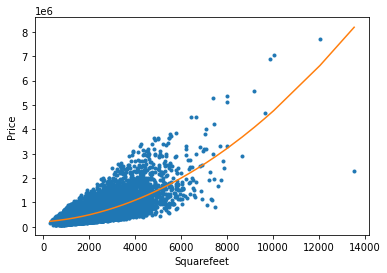

In [18]:
# Scatter plot of data (2nd power of sqft)
plt.plot(poly2_data[['power_1']], poly2_data[['price']],'.',
         poly2_data[['power_1']], model2.predict(poly2_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### 3b. Fit higher order polynomial fits (Use L2 Penalty)

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect? (Use the l2_small_penalty)

#### Degree 3

In [19]:
poly3_data = polynomial_dataframe(df['sqft_living'], 3)
poly3_data['price'] = df['price']

In [20]:
model3 = ridge_model(l2_small_penalty,poly3_data.drop('price',1),poly3_data['price'])
model3.fit(poly3_data.drop('price',1), poly3_data['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [21]:
print("Intercept : ", model3.intercept_)
coeffs = pd.DataFrame(list(zip(poly3_data.drop('price',1).columns,model3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  336362.1287390407


,features,estimated coefficients
0,power_1,-89.678962
1,power_2,0.086901
2,power_3,-0.000004


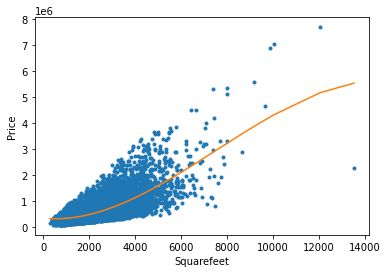

In [22]:
# Scatter plot of data (3rd power of sqft)
plt.plot(poly3_data[['power_1']], poly3_data[['price']],'.',
         poly3_data[['power_1']], model3.predict(poly3_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Degree 4

In [23]:
poly4_data = polynomial_dataframe(df['sqft_living'], 4)
poly4_data['price'] = df['price']

In [24]:
model4 = ridge_model(l2_small_penalty,poly4_data.drop('price',1),poly4_data['price'])
model4.fit(poly4_data.drop('price',1), poly4_data['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [25]:
print("Intercept : ", model4.intercept_)
coeffs = pd.DataFrame(list(zip(poly4_data.drop('price',1).columns,model4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  199746.84707584453


,features,estimated coefficients
0,power_1,1.113136e+02
1,power_2,-3.298565e-03
2,power_3,1.070079e-05
3,power_4,-6.956876e-10


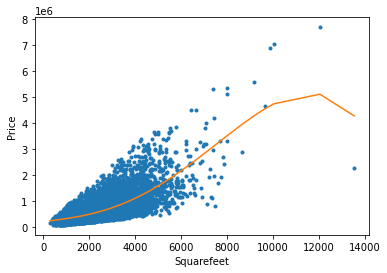

In [26]:
# Scatter plot of data (4th power of sqft)
plt.plot(poly4_data[['power_1']], poly4_data[['price']],'.',
         poly4_data[['power_1']], model4.predict(poly4_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Degree 5

In [27]:
poly5_data = polynomial_dataframe(df['sqft_living'],5)
poly5_data['price'] = df['price']

In [28]:
model5 = ridge_model(l2_small_penalty,poly5_data.drop('price',1),poly5_data['price'])
model5.fit(poly5_data.drop('price',1), poly5_data['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [29]:
print("Intercept : ", model5.intercept_)
coeffs = pd.DataFrame(list(zip(poly5_data.drop('price',1).columns,model5.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  366594.6116929581


,features,estimated coefficients
0,power_1,-1.982699e+02
1,power_2,1.878086e-01
2,power_3,-3.852497e-05
3,power_4,4.612204e-09
4,power_5,-1.936035e-13


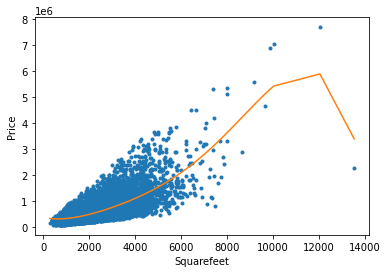

In [30]:
# Scatter plot of data (5th power of sqft)
plt.plot(poly5_data[['power_1']], poly5_data[['price']],'.',
         poly5_data[['power_1']], model5.predict(poly5_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### 3c. Fit a polynomial of order 15 (Use L2 Penalty)

Now try a 15th degree polynomial (Use the L2_small_penalty). Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [31]:
poly15_data = polynomial_dataframe(df['sqft_living'],15)
poly15_data['price'] = df['price']

In [32]:
model15 = ridge_model(l2_small_penalty,poly15_data.drop('price',1),poly15_data['price'])
model15.fit(poly15_data.drop('price',1), poly15_data['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [33]:
print("Intercept : ", model15.intercept_)
coeffs = pd.DataFrame(list(zip(poly15_data.drop('price',1).columns,model15.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  220664.37505312986


,features,estimated coefficients
0,power_1,1.248733e+02
1,power_2,-4.773760e-02
2,power_3,3.014462e-05
3,power_4,-2.444199e-09
4,power_5,-1.941537e-13
5,power_6,8.540857e-18
6,power_7,1.511421e-21
7,power_8,8.279791e-26
8,power_9,6.526031e-31
9,power_10,-3.278950e-34


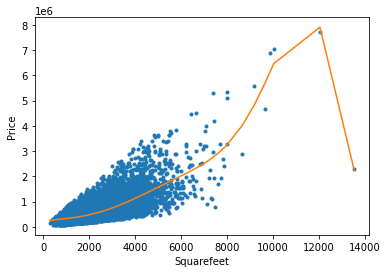

In [34]:
# Scatter plot of data (15th power of sqft)
plt.plot(poly15_data[['power_1']], poly15_data[['price']],'.',
         poly15_data[['power_1']], model15.predict(poly15_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### 3d. Explore Overfitting due to High Variance (Due to less penalization)
Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

#### Sets of our data

In [35]:
set1 = pd.read_csv("wk3_kc_house_set_1_data.csv")
set2 = pd.read_csv("wk3_kc_house_set_2_data.csv")
set3 = pd.read_csv("wk3_kc_house_set_3_data.csv")
set4 = pd.read_csv("wk3_kc_house_set_4_data.csv")

#### Set 1

In [36]:
set1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000.0,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500.0,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000.0,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5400,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
5401,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
5402,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [37]:
poly_set1 = polynomial_dataframe(set1['sqft_living'], 15)
poly_set1['price'] = set1['price']

In [38]:
model_set1 = ridge_model(l2_small_penalty,poly_set1.drop('price',1),poly_set1['price'])
model_set1.fit(poly_set1.drop('price',1), poly_set1['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [39]:
print("Intercept: ", model_set1.intercept_)

Intercept:  288998.10746196273


In [40]:
coeffs = pd.DataFrame(list(zip(poly_set1.drop('price',1).columns,model_set1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,-1.521072e+01
1,power_2,4.322619e-02
2,power_3,7.613014e-06
3,power_4,-1.010525e-09
4,power_5,-3.598302e-14
5,power_6,2.800674e-18
6,power_7,3.295998e-22
7,power_8,1.655002e-26
8,power_9,2.777676e-31
9,power_10,-3.528867e-35


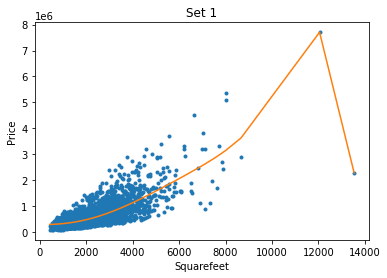

In [41]:
# Scatter plot of set1 data
plt.plot(poly_set1[['power_1']], poly_set1[['price']],'.',
         poly_set1[['power_1']], model_set1.predict(poly_set1.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 1')
plt.show()

#### Set 2

In [42]:
set2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
1,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636
2,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975
3,7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420,6720
4,3523029041,20141009T000000,290000.0,2,0.75,440,8313,1.0,1,3,...,5,440,0,1943,0,98070,47.4339,-122.512,880,26289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
5394,6065300370,20150506T000000,4208000.0,5,6.00,7440,21540,2.0,0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
5395,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
5396,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,...,12,6660,1070,2004,0,98077,47.7615,-122.084,2660,39292


In [43]:
poly_set2 = polynomial_dataframe(set2['sqft_living'], 15)
poly_set2['price'] = set2['price']

In [44]:
model_set2 = ridge_model(l2_small_penalty,poly_set2.drop('price',1),poly_set2['price'])
model_set2.fit(poly_set2.drop('price',1), poly_set2['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [45]:
print("Intercept: ", model_set2.intercept_)

Intercept:  113497.43719179789


In [46]:
coeffs = pd.DataFrame(list(zip(poly_set2.drop('price',1).columns,model_set2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.881851e+02
1,power_2,-1.006667e-01
2,power_3,1.969374e-05
3,power_4,2.734468e-09
4,power_5,-2.151269e-13
5,power_6,-5.519020e-17
6,power_7,-3.675677e-21
7,power_8,8.955635e-26
8,power_9,4.705539e-29
9,power_10,5.946576e-33


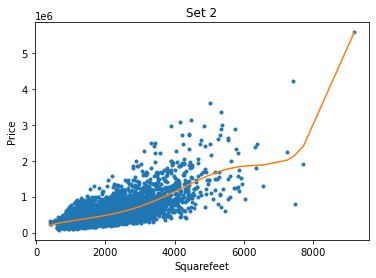

In [47]:
# Scatter plot of set2 data
plt.plot(poly_set2[['power_1']], poly_set2[['price']],'.',
         poly_set2[['power_1']], model_set2.predict(poly_set2.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 2')
plt.show()

#### Set 3

In [48]:
set3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9266700190,20150511T000000,245000.0,1,1.00,390,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100
1,745000005,20140825T000000,145000.0,1,0.75,480,9750,1.0,0,0,...,4,480,0,1948,0,98146,47.4982,-122.362,1550,9924
2,7849202585,20140904T000000,170000.0,1,1.00,480,4560,1.0,0,0,...,5,480,0,1922,0,98065,47.5253,-121.826,890,4803
3,2420069251,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4,3702900165,20141104T000000,295000.0,1,1.00,520,5600,1.0,0,0,...,6,520,0,1918,0,98116,47.5579,-122.395,1030,5265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,...,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593
5405,3303850390,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
5406,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
5407,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [49]:
poly_set3 = polynomial_dataframe(set3['sqft_living'], 15)
poly_set3['price'] = set3['price']

In [50]:
model_set3 = ridge_model(l2_small_penalty,poly_set3.drop('price',1),poly_set3['price'])
model_set3.fit(poly_set3.drop('price',1), poly_set3['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [51]:
print("Intercept: ", model_set3.intercept_)

Intercept:  174149.60431201715


In [52]:
coeffs = pd.DataFrame(list(zip(poly_set3.drop('price',1).columns,model_set3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,1.871745e+02
1,power_2,-6.120770e-02
2,power_3,2.365133e-05
3,power_4,-1.986093e-10
4,power_5,-2.520728e-13
5,power_6,-1.183843e-17
6,power_7,9.608936e-22
7,power_8,1.822185e-25
8,power_9,1.275362e-29
9,power_10,7.234892e-35


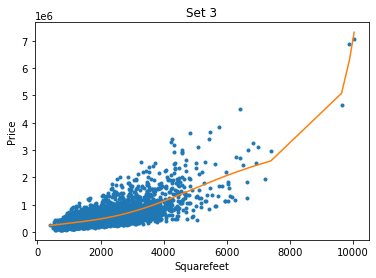

In [53]:
# Scatter plot of set3 data
plt.plot(poly_set3[['power_1']], poly_set3[['price']],'.',
         poly_set3[['power_1']], model_set3.predict(poly_set3.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 3')
plt.show()

#### Set 4

In [54]:
set4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
1,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
2,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
3,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4,8655900162,20150219T000000,156000.0,1,0.75,470,15000,1.0,0,0,...,4,470,0,1947,0,98014,47.6554,-121.908,1730,22500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803
5398,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
5399,7851980260,20140730T000000,1110000.0,5,3.50,7350,12231,2.0,0,4,...,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587
5400,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619


In [55]:
poly_set4 = polynomial_dataframe(set4['sqft_living'], 15)
poly_set4['price'] = set4['price']

In [56]:
model_set4 = ridge_model(l2_small_penalty,poly_set4.drop('price',1),poly_set4['price'])
model_set4.fit(poly_set4.drop('price',1), poly_set4['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [57]:
print("Intercept: ", model_set4.intercept_)

Intercept:  175579.19735917792


In [58]:
coeffs = pd.DataFrame(list(zip(poly_set4.drop('price',1).columns,model_set4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,1.290052e+02
1,power_2,2.495609e-02
2,power_3,-1.328202e-05
3,power_4,2.004839e-09
4,power_5,6.909411e-13
5,power_6,1.951527e-17
6,power_7,-1.277240e-20
7,power_8,-2.494318e-24
8,power_9,-2.106240e-28
9,power_10,4.709508e-33


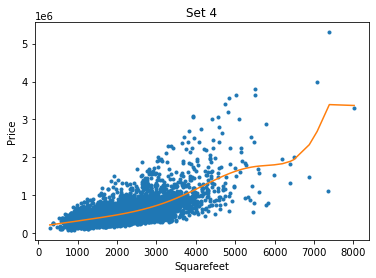

In [59]:
# Scatter plot of set4 data
plt.plot(poly_set4[['power_1']], poly_set4[['price']],'.',
         poly_set4[['power_1']], model_set4.predict(poly_set4.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 4')
plt.show()

What do you observe? Validate your understanding based on the output you got.

The overfitting is getting reduced on each set.

### 4. Penalizing the Coefficient to Prevent Overfitting

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)




In [60]:
l2_large_penalty=1.23e2

#### 4a. Repeat steps 3a and 3b (Using large L2 penalty)

#### Degree 2

In [61]:
poly2_data = polynomial_dataframe(df['sqft_living'], 2)
poly2_data['price'] = df['price']

In [62]:
model2 = ridge_model(l2_large_penalty, poly2_data.drop('price',1), poly2_data['price'])
model2.fit(poly2_data.drop('price',1), poly2_data['price'])

Ridge(alpha=123.0, normalize=True)

In [63]:
print("Intercept : ", model2.intercept_)
coeffs = pd.DataFrame(list(zip(poly2_data.drop('price',1).columns,model2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  533373.3638489783


,features,estimated coefficients
0,power_1,2.245517
1,power_2,0.000395


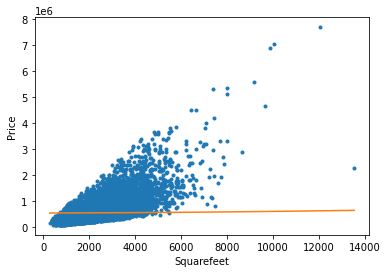

In [64]:
# Scatter plot of data (2nd power of sqft)
plt.plot(poly2_data[['power_1']], poly2_data[['price']],'.',
         poly2_data[['power_1']], model2.predict(poly2_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Degree 3

In [65]:
poly3_data = polynomial_dataframe(df['sqft_living'], 3)
poly3_data['price'] = df['price']

In [66]:
model3 = ridge_model(l2_large_penalty, poly3_data.drop('price',1), poly3_data['price'])
model3.fit(poly3_data.drop('price',1), poly3_data['price'])

Ridge(alpha=123.0, normalize=True)

In [67]:
print("Intercept : ", model3.intercept_)
coeffs = pd.DataFrame(list(zip(poly3_data.drop('price',1).columns,model3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  532639.3398224524


,features,estimated coefficients
0,power_1,2.234187e+00
1,power_2,3.930279e-04
2,power_3,5.000877e-08


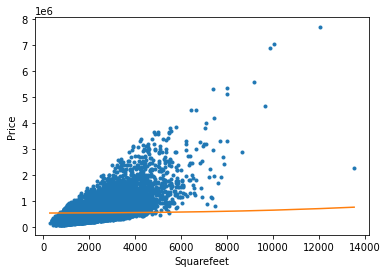

In [68]:
# Scatter plot of data (3rd power of sqft)
plt.plot(poly3_data[['power_1']], poly3_data[['price']],'.',
         poly3_data[['power_1']], model3.predict(poly3_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Degree 4

In [69]:
poly4_data = polynomial_dataframe(df['sqft_living'], 4)
poly4_data['price'] = df['price']

In [70]:
model4 = ridge_model(l2_large_penalty, poly4_data.drop('price',1), poly4_data['price'])
model4.fit(poly4_data.drop('price',1), poly4_data['price'])

Ridge(alpha=123.0, normalize=True)

In [71]:
print("Intercept : ", model4.intercept_)
coeffs = pd.DataFrame(list(zip(poly4_data.drop('price',1).columns,model4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  532454.8536303687


,features,estimated coefficients
0,power_1,2.229377e+00
1,power_2,3.917750e-04
2,power_3,4.975660e-08
3,power_4,3.660983e-12


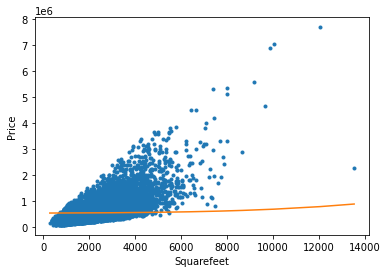

In [72]:
# Scatter plot of data (4th power of sqft)
plt.plot(poly4_data[['power_1']], poly4_data[['price']],'.',
         poly4_data[['power_1']], model4.predict(poly4_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Degree 5

In [73]:
poly5_data = polynomial_dataframe(df['sqft_living'], 5)
poly5_data['price'] = df['price']

In [74]:
model5 = ridge_model(l2_large_penalty, poly5_data.drop('price',1), poly5_data['price'])
model5.fit(poly5_data.drop('price',1), poly5_data['price'])

Ridge(alpha=123.0, normalize=True)

In [75]:
print("Intercept : ", model5.intercept_)
coeffs = pd.DataFrame(list(zip(poly5_data.drop('price',1).columns,model5.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  532412.3764982576


,features,estimated coefficients
0,power_1,2.227473e+00
1,power_2,3.911785e-04
2,power_3,4.961618e-08
3,power_4,3.642730e-12
4,power_5,2.050434e-16


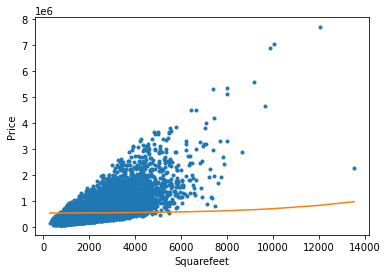

In [76]:
# Scatter plot of data (5th power of sqft)
plt.plot(poly5_data[['power_1']], poly5_data[['price']],'.',
         poly5_data[['power_1']], model5.predict(poly5_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### 4b. Fit a polynomial of order 15 (Using large L2 penalty)

In [77]:
poly15_data = polynomial_dataframe(df['sqft_living'], 15)
poly15_data['price'] = df['price']

In [78]:
model15 = ridge_model(l2_large_penalty, poly15_data.drop('price',1), poly15_data['price'])
model15.fit(poly15_data.drop('price',1), poly15_data['price'])

Ridge(alpha=123.0, normalize=True)

In [79]:
print("Intercept : ", model15.intercept_)
coeffs = pd.DataFrame(list(zip(poly15_data.drop('price',1).columns,model15.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  532392.4372130121


,features,estimated coefficients
0,power_1,2.224661e+00
1,power_2,3.900243e-04
2,power_3,4.928583e-08
3,power_4,3.593951e-12
4,power_5,2.002870e-16
5,power_6,1.090384e-20
6,power_7,6.217523e-25
7,power_8,3.720638e-29
8,power_9,2.310575e-33
9,power_10,1.474113e-37


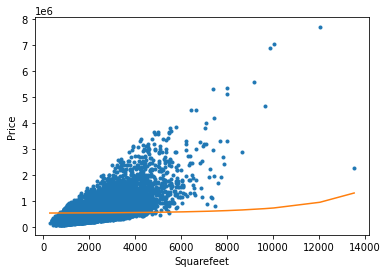

In [80]:
# Scatter plot of data (15th power of sqft)
plt.plot(poly15_data[['power_1']], poly15_data[['price']],'.',
         poly15_data[['power_1']], model15.predict(poly15_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### 4c. Overfitting or Not?

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. These curves should vary a lot less, now that you introduced regularization.

#### Sets of our data

In [81]:
set1 = pd.read_csv("wk3_kc_house_set_1_data.csv")
set2 = pd.read_csv("wk3_kc_house_set_2_data.csv")
set3 = pd.read_csv("wk3_kc_house_set_3_data.csv")
set4 = pd.read_csv("wk3_kc_house_set_4_data.csv")

#### Set 1

In [82]:
set1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000.0,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500.0,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000.0,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5400,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
5401,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
5402,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [83]:
poly_set1 = polynomial_dataframe(set1['sqft_living'], 15)
poly_set1['price'] = set1['price']

In [84]:
model_set1 = ridge_model(l2_large_penalty,poly_set1.drop('price',1),poly_set1['price'])
model_set1.fit(poly_set1.drop('price',1), poly_set1['price'])

Ridge(alpha=123.0, normalize=True)

In [85]:
print("Intercept: ", model_set1.intercept_)

Intercept:  539103.0310577955


In [86]:
coeffs = pd.DataFrame(list(zip(poly_set1.drop('price',1).columns,model_set1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.328068e+00
1,power_2,3.536216e-04
2,power_3,3.319697e-08
3,power_4,2.000825e-12
4,power_5,1.114926e-16
5,power_6,6.577861e-21
6,power_7,4.129395e-25
7,power_8,2.703938e-29
8,power_9,1.816148e-33
9,power_10,1.238243e-37


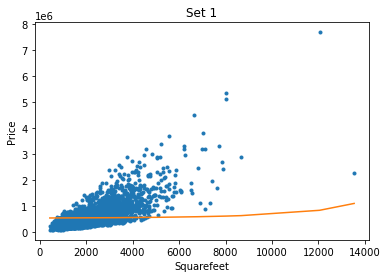

In [87]:
# Scatter plot of set1 data
plt.plot(poly_set1[['power_1']], poly_set1[['price']],'.',
         poly_set1[['power_1']], model_set1.predict(poly_set1.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 1')
plt.show()

#### Set 2

In [88]:
set2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
1,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636
2,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975
3,7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420,6720
4,3523029041,20141009T000000,290000.0,2,0.75,440,8313,1.0,1,3,...,5,440,0,1943,0,98070,47.4339,-122.512,880,26289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
5394,6065300370,20150506T000000,4208000.0,5,6.00,7440,21540,2.0,0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
5395,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
5396,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,...,12,6660,1070,2004,0,98077,47.7615,-122.084,2660,39292


In [89]:
poly_set2 = polynomial_dataframe(set2['sqft_living'], 15)
poly_set2['price'] = set2['price']

In [90]:
model_set2 = ridge_model(l2_large_penalty,poly_set2.drop('price',1),poly_set2['price'])
model_set2.fit(poly_set2.drop('price',1), poly_set2['price'])

Ridge(alpha=123.0, normalize=True)

In [91]:
print("Intercept: ", model_set2.intercept_)

Intercept:  529853.0253577976


In [92]:
coeffs = pd.DataFrame(list(zip(poly_set2.drop('price',1).columns,model_set2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.097569e+00
1,power_2,3.908175e-04
2,power_3,6.671899e-08
3,power_4,8.900030e-12
4,power_5,9.726399e-16
5,power_6,9.697337e-20
6,power_7,9.505645e-24
7,power_8,9.444910e-28
8,power_9,9.571913e-32
9,power_10,9.869452e-36


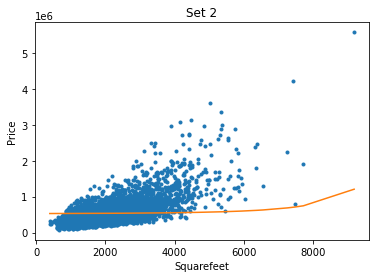

In [93]:
# Scatter plot of set2 data
plt.plot(poly_set2[['power_1']], poly_set2[['price']],'.',
         poly_set2[['power_1']], model_set2.predict(poly_set2.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 2')
plt.show()

#### Set 3

In [94]:
set3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9266700190,20150511T000000,245000.0,1,1.00,390,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100
1,745000005,20140825T000000,145000.0,1,0.75,480,9750,1.0,0,0,...,4,480,0,1948,0,98146,47.4982,-122.362,1550,9924
2,7849202585,20140904T000000,170000.0,1,1.00,480,4560,1.0,0,0,...,5,480,0,1922,0,98065,47.5253,-121.826,890,4803
3,2420069251,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4,3702900165,20141104T000000,295000.0,1,1.00,520,5600,1.0,0,0,...,6,520,0,1918,0,98116,47.5579,-122.395,1030,5265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,...,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593
5405,3303850390,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
5406,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
5407,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [95]:
poly_set3 = polynomial_dataframe(set3['sqft_living'], 15)
poly_set3['price'] = set3['price']

In [96]:
model_set3 = ridge_model(l2_large_penalty,poly_set3.drop('price',1),poly_set3['price'])
model_set3.fit(poly_set3.drop('price',1), poly_set3['price'])

Ridge(alpha=123.0, normalize=True)

In [97]:
print("Intercept: ", model_set3.intercept_)

Intercept:  533640.1140974432


In [98]:
coeffs = pd.DataFrame(list(zip(poly_set3.drop('price',1).columns,model_set3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.289063e+00
1,power_2,4.124722e-04
2,power_3,6.088353e-08
3,power_4,6.585722e-12
4,power_5,6.152782e-16
5,power_6,5.644466e-20
6,power_7,5.288344e-24
7,power_8,5.070914e-28
8,power_9,4.946573e-32
9,power_10,4.880438e-36


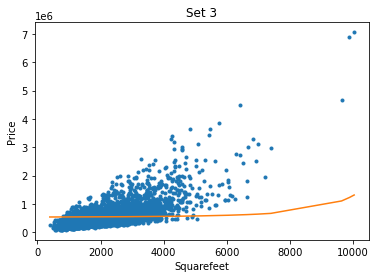

In [99]:
# Scatter plot of set3 data
plt.plot(poly_set3[['power_1']], poly_set3[['price']],'.',
         poly_set3[['power_1']], model_set3.predict(poly_set3.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 3')
plt.show()

#### Set 4

In [100]:
set4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
1,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
2,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
3,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4,8655900162,20150219T000000,156000.0,1,0.75,470,15000,1.0,0,0,...,4,470,0,1947,0,98014,47.6554,-121.908,1730,22500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803
5398,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
5399,7851980260,20140730T000000,1110000.0,5,3.50,7350,12231,2.0,0,4,...,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587
5400,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619


In [101]:
poly_set4 = polynomial_dataframe(set4['sqft_living'], 15)
poly_set4['price'] = set4['price']

In [102]:
model_set4 = ridge_model(l2_large_penalty,poly_set4.drop('price',1),poly_set4['price'])
model_set4.fit(poly_set4.drop('price',1), poly_set4['price'])

Ridge(alpha=123.0, normalize=True)

In [103]:
print("Intercept: ", model_set4.intercept_)

Intercept:  524562.9690466832


In [104]:
coeffs = pd.DataFrame(list(zip(poly_set4.drop('price',1).columns,model_set4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.085962e+00
1,power_2,4.050358e-04
2,power_3,7.468646e-08
3,power_4,1.130966e-11
4,power_5,1.458644e-15
5,power_6,1.735613e-19
6,power_7,2.016096e-23
7,power_8,2.346053e-27
8,power_9,2.756361e-31
9,power_10,3.270431e-35


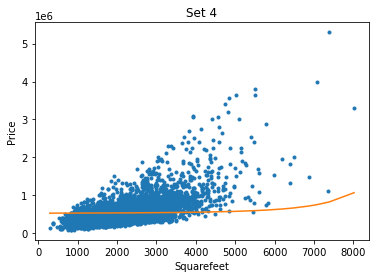

In [105]:
# Scatter plot of set4 data
plt.plot(poly_set4[['power_1']], poly_set4[['price']],'.',
         poly_set4[['power_1']], model_set4.predict(poly_set4.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 4')
plt.show()

#### 4d. Controlling overfitting

Select the best alpha value for the 15th-order polynomial model. Re-fit the model on the data. Print the estimated coefficients and plot the model on the scatter plot

In [106]:
l2_large_penalty=1.5e1

In [107]:
poly15_data = polynomial_dataframe(df['sqft_living'], 15)
poly15_data['price'] = df['price']

In [108]:
model15 = ridge_model(l2_large_penalty, poly15_data.drop('price',1), poly15_data['price'])
model15.fit(poly15_data.drop('price',1), poly15_data['price'])

Ridge(alpha=15.0, normalize=True)

In [109]:
print("Intercept : ", model15.intercept_)

Intercept :  486875.90559096565


In [110]:
coeffs = pd.DataFrame(list(zip(poly15_data.drop('price',1).columns,model15.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,1.564699e+01
1,power_2,2.697316e-03
2,power_3,3.283688e-07
3,power_4,2.233929e-11
4,power_5,1.116339e-15
5,power_6,5.233403e-20
6,power_7,2.467665e-24
7,power_8,1.163927e-28
8,power_9,5.306829e-33
9,power_10,2.180766e-37


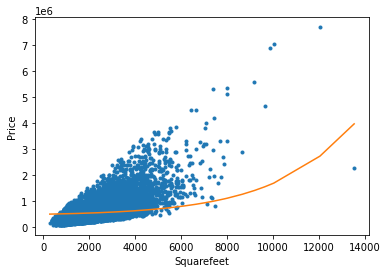

In [111]:
# Scatter plot of data (15th power of sqft)
plt.plot(poly15_data[['power_1']], poly15_data[['price']],'.',
         poly15_data[['power_1']], model15.predict(poly15_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

### 5. Selecting an L2 penalty via cross-validation

Repeat step 4 but this time using L2 Penalty.

In [112]:
def k_fold_cross_validation(k, l2_penalty, data):    
    rss_sum = 0
    n = len(data)
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])    
        model = linear_model.Ridge(alpha = l2_penalty)
        model.fit(training_set.drop('price',1),training_set['price'])
        predictions = model.predict(validation_set.drop('price',1))
        residuals = validation_set['price'] - predictions
        rss = sum(residuals * residuals)
        rss_sum += rss
    validation_error = rss_sum / k 
    return validation_error

In [113]:
df = pd.read_csv("wk3_kc_house_train_data.csv")

In [114]:
poly_data = polynomial_dataframe(df['sqft_living'], 15)
poly_data['price'] = df['price']

In [115]:
poly_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,1960,3841600,7529536000,14757890560000,28925465497600000,56693912375296000000,111120068255580160000000,217795333780937113600000000,426878854210636742656000000000,836682554252848015605760000000000,1639897806335582110587289600000000000,3214199700417740936751087616000000000000,6299831412818772236032131727360000000000000,12347669569124793582622978185625600000000000000,2420143235548459542194103724382617600000000000...,604000.0
1,5420,29376400,159220088000,862972876960000,4677312993123200000,25351036422727744000000,137402617411184372480000000,744722186368619298841600000000,4036394250117916599721472000000000,21877256835639107970490378240000000000,118574732049163965200057850060800000000000,642675047706468691384313547329536000000000000,3483298758569060307302979426526085120000000000000,1887947927144430686558214849177138135040000000...,1023267776512281432114552448254008869191680000...,1225000.0
2,1160,1345600,1560896000,1810639360000,2100341657600000,2436396322816000000,2826219734466560000000,3278414891981209600000000,3802961274698203136000000000,4411435078649915637760000000000,5117264691233902139801600000000000,5936027041831326482169856000000000000,6885791368524338719317032960000000000000,7987517987488232914407758233600000000000000,9265520865486350180712999550976000000000000000,468000.0
3,1430,2044900,2924207000,4181616010000,5979710894300000,8550986578849000000,12227910807754070000000,17485912455088320100000000,25004854810776297743000000000,35756942379410105772490000000000,51132427602556451254660700000000000,73119371471655725294164801000000000000,104560701204467687170655665430000000000000,149521802722388792654037601564900000000000000,213816177893015973495273770237807000000000000000,310000.0
4,1370,1876900,2571353000,3522753610000,4826172445700000,6611856250609000000,9058243063334330000000,12409792996768032100000000,17001416405572203977000000000,23291940475633919448490000000000,31909958451618469644431300000000000,43716643078717303412870881000000000000,59891801017842705675633106970000000000000,82051767394444506775617356548900000000000000,112410921330388974282595778471993000000000000000,400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,1490,2220100,3307949000,4928844010000,7343977574900000,10942526586601000000,16304364614035490000000,24293503274912880100000000,36197319879620191349000000000,53934006620634085110010000000000,80361669864744786813914900000000000,119738888098469732352733201000000000000,178410943266719901205572469490000000000000,265832305467412652796302979540100000000000000,396090135146444852666491439514749000000000000000,429000.0
9757,2520,6350400,16003008000,40327580160000,101625502003200000,256096265048064000000,645362587921121280000000,1626313721561225625600000000,4098310578334288576512000000000,10327742657402407212810240000000000,26025911496654066176281804800000000000,65585296971568246764230148096000000000000,165274948368351981845859973201920000000000000,416492869888246994251567132468838400000000000000,1049562032118382425513949173821472768000000000...,610685.0
9758,3510,12320100,43243551000,151784864010000,532764872675100000,1870004703089601000000,6563716507844499510000000,23038644942534193280100000000,80865643748295018413151000000000,283838409556515514630160010000000000,996272817543369456351861635100000000000,3496917589577226791795034339201000000000000,12274180739416066039200570530595510000000000000,4308237439535039179759400256239024010000000000...,1512191341276798752095549489939897427510000000...,1007500.0
9759,1020,1040400,1061208000,1082432160000,1104080803200000,1126162419264000000,1148685667649280000000,1171659381002265600000000,1195092568622310912000000000,1218994419994757130240000000000,1243374308394652272844800000000000,1268241794562545318301696000000000000,1293606630453796224667729920000000000000,1319478763062872149161084518400000000000000,1345868338

In [116]:
val_err_dict = {}
for l2_penalty in np.logspace(1,10, num=100):
    val_err = k_fold_cross_validation(10, l2_penalty, poly_data)    
    val_err_dict[l2_penalty] = val_err

/Users/rushabhrumde/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83975e-115): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/rushabhrumde/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.04944e-114): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Text(0, 0.5, 'error')

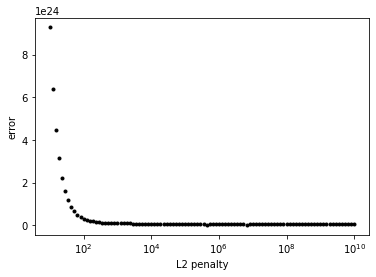

In [117]:
l2_penalty = val_err_dict.keys()
validation_error = val_err_dict.values()
l2_table = pd.DataFrame(list(val_err_dict.items()),columns=['l2_penalty','validation_error'])
plt.plot(l2_table['l2_penalty'],l2_table['validation_error'],'k.')
plt.xscale('log')
plt.xlabel('L2 penalty')
plt.ylabel('error')

In [118]:
optimal_penalty = min(val_err_dict.items(), key = lambda x:x[1])
optimal_penalty[0]

432876.12810830615

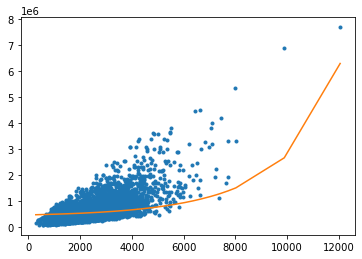

In [120]:
df = df.sort_values(['sqft_living','price'])
sales_data = polynomial_dataframe(df['sqft_living'], 15)
sales_data['price'] = df['price']
l2_penalty_best = optimal_penalty[0]
model_best = ridge_model(10, sales_data.drop('price',1), sales_data['price'])
plot_fitted_line(sales_data,model_best)

In [121]:
test_data = pd.read_csv("wk3_kc_house_test_data.csv")

In [122]:
poly_test = polynomial_dataframe(test_data['sqft_living'], 15)
poly_test['price'] = test_data['price']
predictions = model_best.predict(poly_test.drop('price',1))
errors = predictions - test_data['price']
rss = (errors*errors).sum()
print("RSS with Optimal L2 penalty on Data set: %.4g" % rss)

RSS with Optimal L2 penalty on Data set: 2.256e+14


Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html